<a href="https://colab.research.google.com/github/Shubhamkumar-op/ML_projects/blob/main/KNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer

 98% 15.0M/15.3M [00:01<00:00, 14.0MB/s]
100% 15.3M/15.3M [00:01<00:00, 8.69MB/s]


In [5]:
from zipfile import ZipFile

dataset = '/content/digit-recognizer.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [7]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df_train.drop(['label'],axis=1)
y = df_train['label']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
scaler =StandardScaler()

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [19]:
operations = [('scaler',scaler),('knn',knn)]

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline(operations)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
k_values = list(range(1,20))

In [24]:
param_grid = {'knn__n_neighbors':k_values}

In [25]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [26]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [27]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Final Model

In [31]:
scaler = StandardScaler()
knn3 = KNeighborsClassifier(n_neighbors=3)
operation = [('scaler',scaler),
             ('knn3',knn3)]

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [33]:
pipe_pred = pipe.predict(X_test)
pipe_pred

array([8, 1, 9, ..., 7, 4, 4])

In [34]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1025
           1       0.94      0.99      0.97      1146
           2       0.95      0.93      0.94      1072
           3       0.92      0.94      0.93      1151
           4       0.95      0.93      0.94      1024
           5       0.91      0.92      0.91       898
           6       0.95      0.96      0.96      1010
           7       0.94      0.92      0.93      1135
           8       0.97      0.88      0.92      1005
           9       0.91      0.91      0.91      1034

    accuracy                           0.94     10500
   macro avg       0.94      0.94      0.94     10500
weighted avg       0.94      0.94      0.94     10500



In [37]:
# cm = confusion_matrix(y_test, X_test_pred, labels=model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# disp.plot()
# plt.show()

In [39]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
pipe_pred_test = pipe.predict(df_test)
pipe_pred_test

array([2, 0, 9, ..., 3, 9, 2])

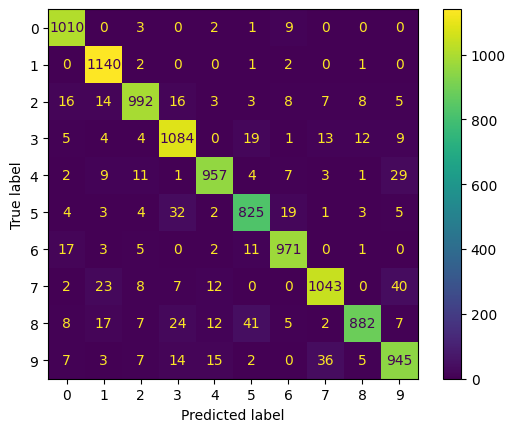

In [44]:
cm = confusion_matrix(y_test, pipe_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
disp.plot()
plt.show()